In [6]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow import keras



In [38]:
from keras.datasets import imdb

In [66]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


In [70]:
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=1000)
x_test = pad_sequences(x_test, maxlen=1000)


In [71]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [72]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=512, verbose=1)


Epoch 1/20
35/35 [==============================] - 3s 83ms/step - loss: 0.0038 - accuracy: 0.9962 - val_loss: 0.1111 - val_accuracy: 0.8699
Epoch 2/20
35/35 [==============================] - 0s 13ms/step - loss: 0.0038 - accuracy: 0.9962 - val_loss: 0.1113 - val_accuracy: 0.8697
Epoch 3/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 0.9962 - val_loss: 0.1115 - val_accuracy: 0.8697
Epoch 4/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.9962 - val_loss: 0.1119 - val_accuracy: 0.8692
Epoch 5/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 0.9963 - val_loss: 0.1120 - val_accuracy: 0.8687
Epoch 6/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.9963 - val_loss: 0.1122 - val_accuracy: 0.8687
Epoch 7/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.9963 - val_loss: 0.1124 - val_accuracy: 0.8685
Epoch 8/20
35

In [73]:
print(np.mean(history.history["val_accuracy"]))

0.8683533370494843


In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


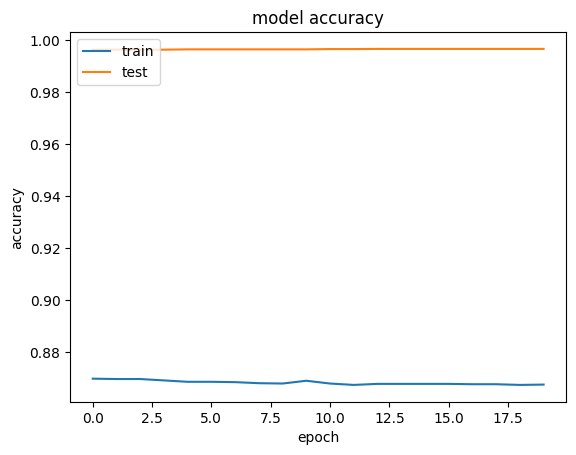

In [75]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

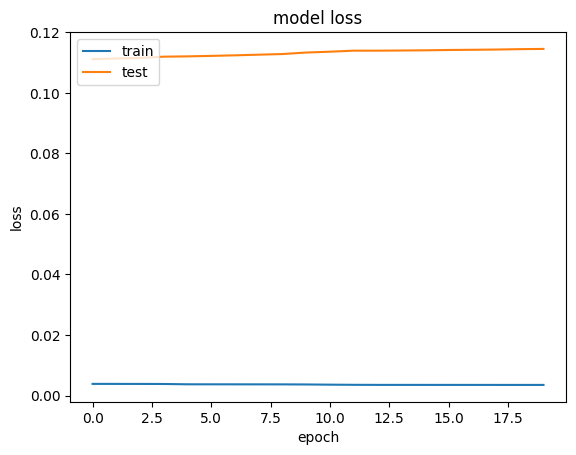

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()